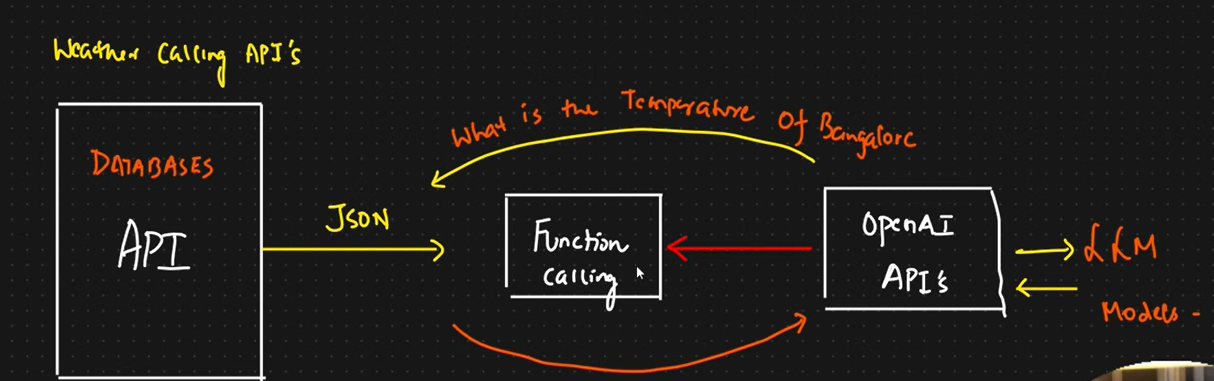

# 3rd PARTY API
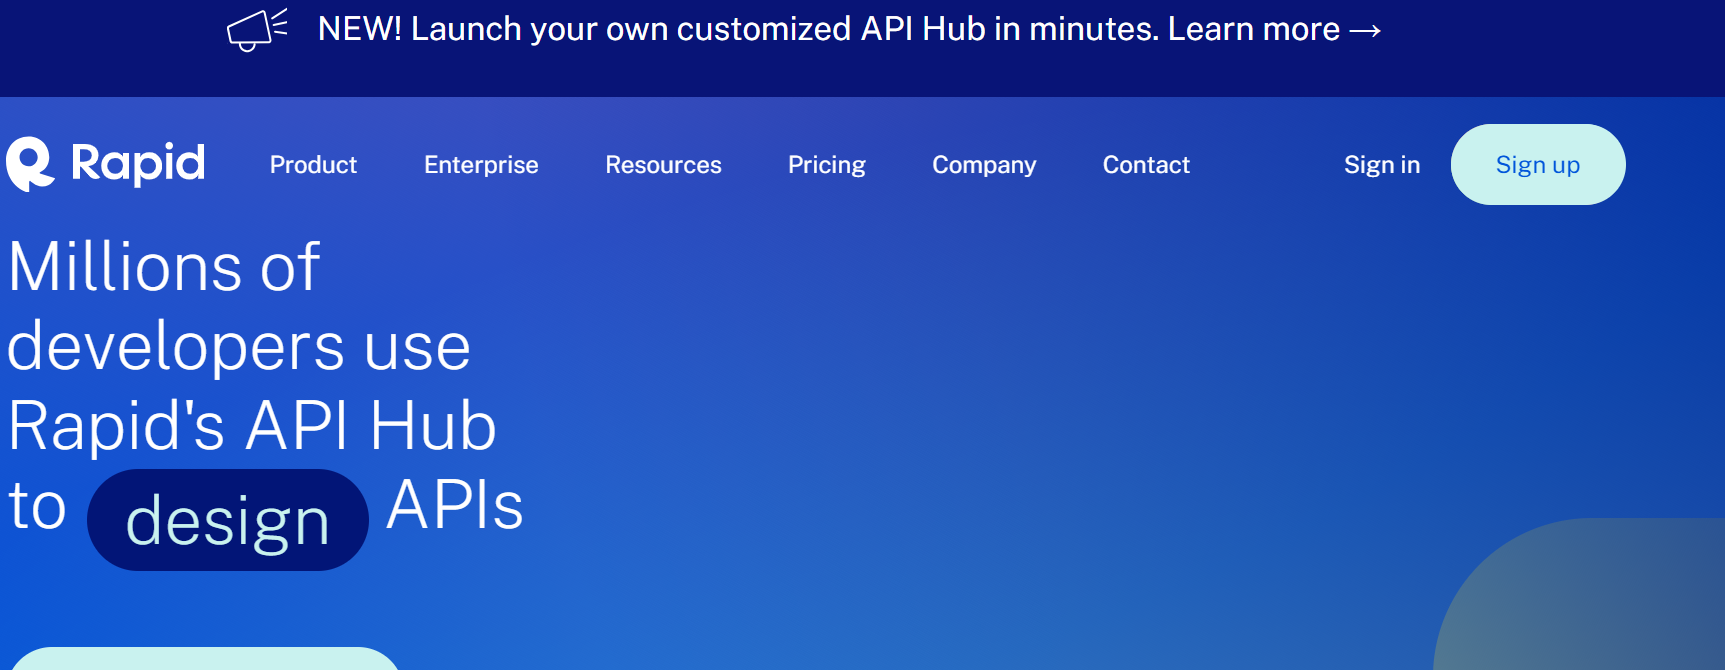

# Weather API
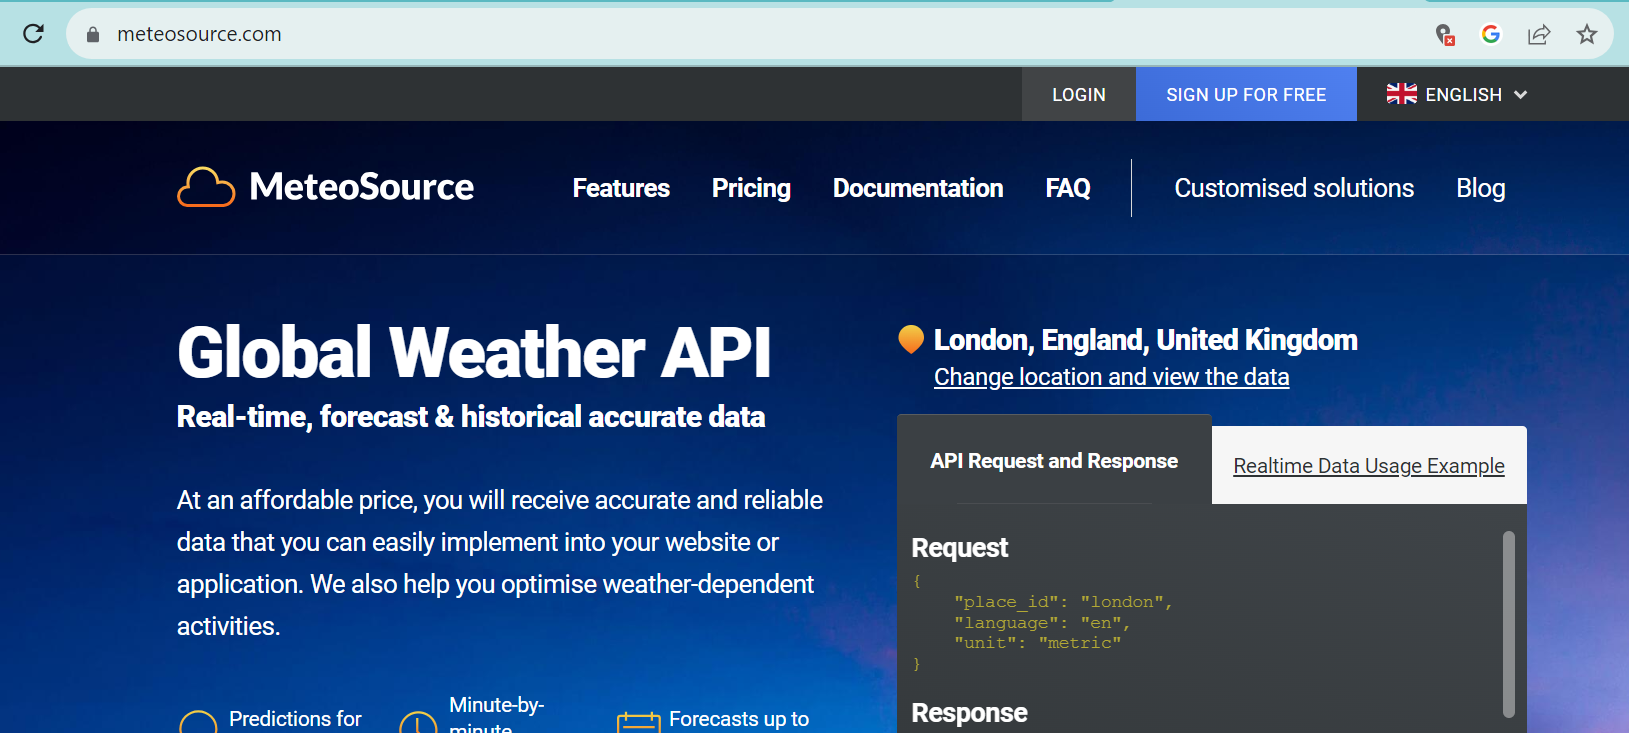

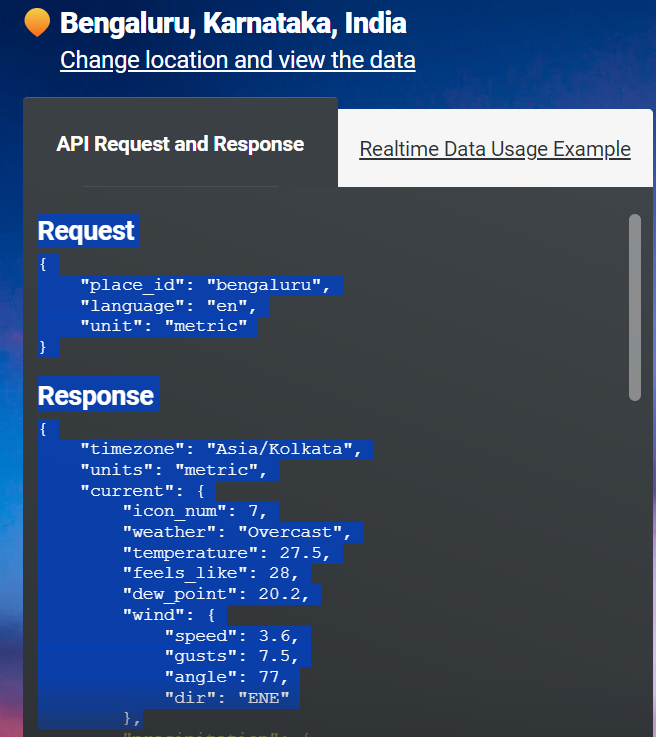

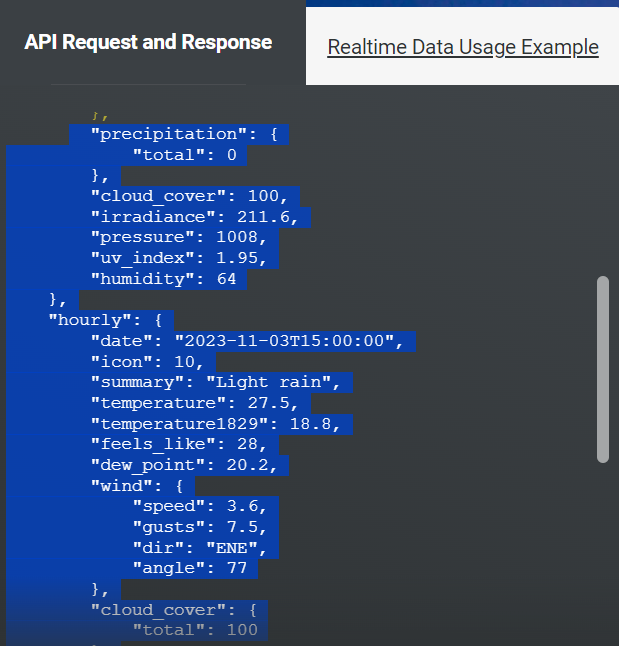

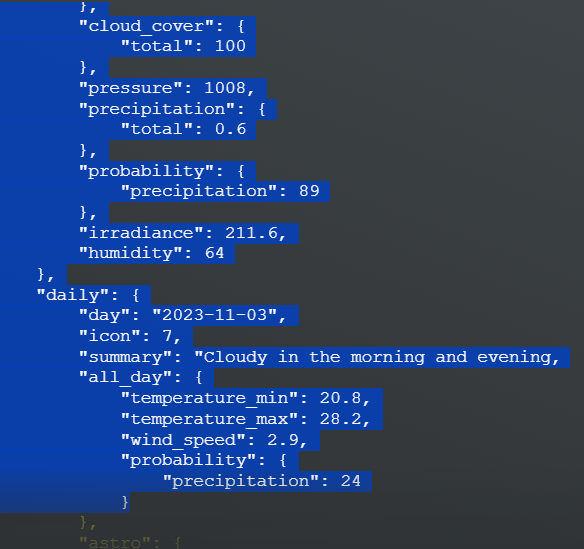

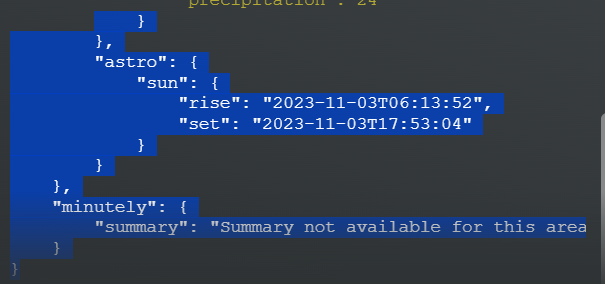

## The Power OF Function Calling using OpenAI API

In [18]:
import os
import openai
openai.api_key = os.getenv("OPENAI_API_KEY")

In [19]:
OPENAI_API_KEY='sk-'


In [ ]:
import os
import openai
#from constant import openai_key
#from constant import openai_key

# openai.api_key=openai_key

In [20]:
completion=openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=[
        {"role": "system", "content": "You are a assistant which informs about temperature."},
        {"role": "user", "content": "Hey there"}
    ]
)

In [21]:
print(completion.choices[0].message)

{
  "role": "assistant",
  "content": "Hello! How can I assist you today?"
}


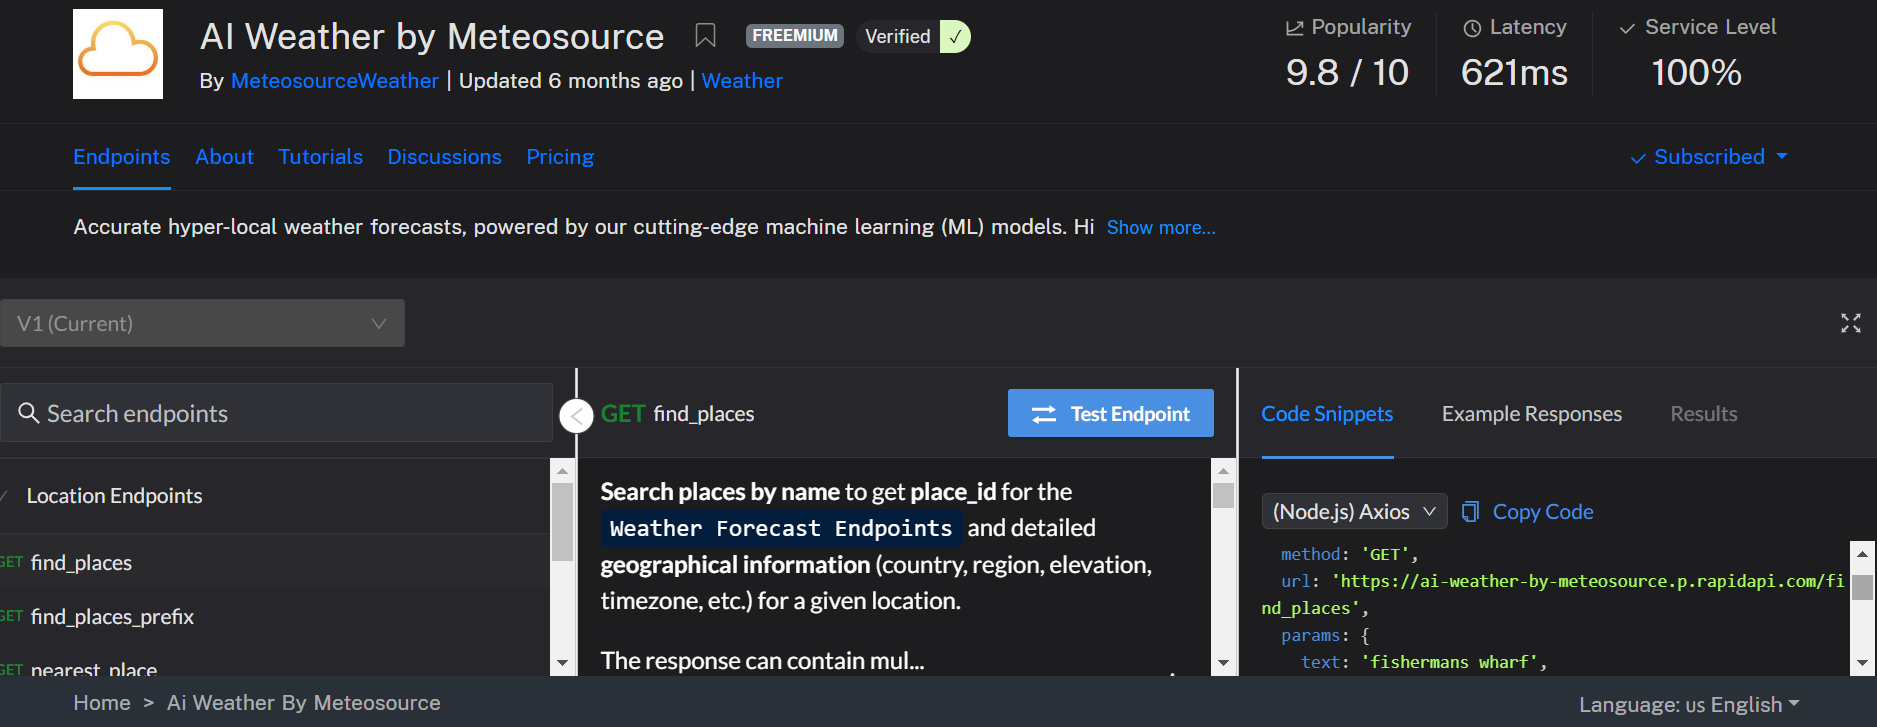

In [27]:
# Example dummy function hard coded to return the same weather
# In production, this could be your backend API or an external API
import requests
def get_current_weather(location):
    """Get the current weather in a given location"""

    url = "https://ai-weather-by-meteosource.p.rapidapi.com/find_places"

    querystring = {"text":location}

    headers = {
      "X-RapidAPI-Key":  'XXX-- Key Hidden',
      "X-RapidAPI-Host": 'ai-weather-by-meteosource.p.rapidapi.com'
    }


    response = requests.get(url, headers=headers, params=querystring)

    print(response.json())
  
    return response.json()


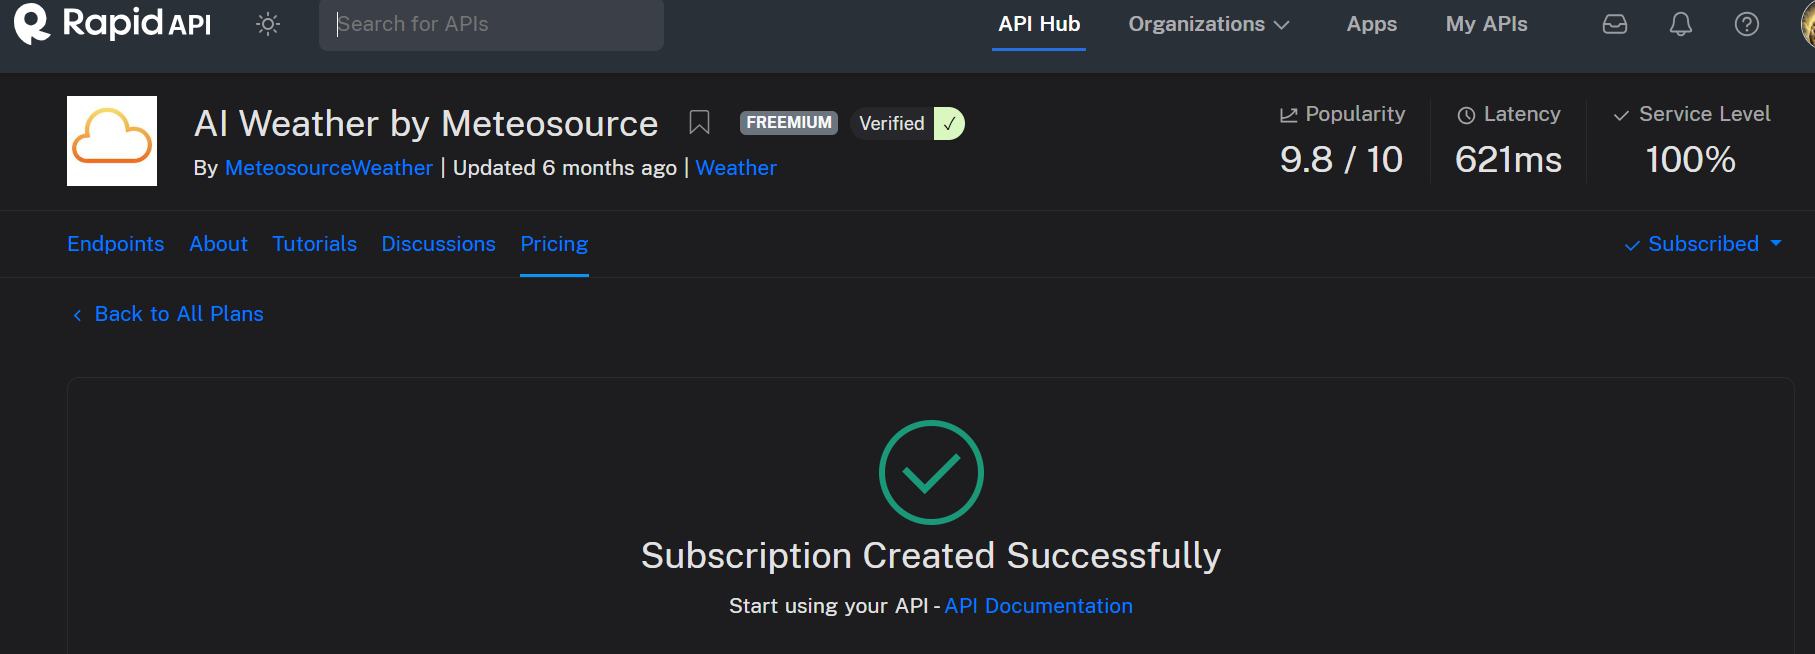

In [29]:
response=get_current_weather('Bangalore')

[{'name': 'Bengaluru', 'place_id': 'bengaluru', 'adm_area1': 'Karnataka', 'adm_area2': 'Bengaluru Urban', 'country': 'India', 'lat': '12.97194N', 'lon': '77.59369E', 'timezone': 'Asia/Kolkata', 'type': 'settlement'}, {'name': 'Bengaluru Urban', 'place_id': 'bangalore-urban', 'adm_area1': 'Karnataka', 'adm_area2': 'Bengaluru Urban', 'country': 'India', 'lat': '13.0N', 'lon': '77.58333E', 'timezone': 'Asia/Kolkata', 'type': 'administrative_area'}, {'name': 'Yelahanka', 'place_id': 'yelahanka', 'adm_area1': 'Karnataka', 'adm_area2': 'Bengaluru Urban', 'country': 'India', 'lat': '13.10073N', 'lon': '77.59632E', 'timezone': 'Asia/Kolkata', 'type': 'settlement'}, {'name': 'Anekal', 'place_id': 'anekal', 'adm_area1': 'Karnataka', 'adm_area2': 'Bengaluru Urban', 'country': 'India', 'lat': '12.7111N', 'lon': '77.69557E', 'timezone': 'Asia/Kolkata', 'type': 'settlement'}, {'name': 'Devanahalli', 'place_id': 'devanhalli', 'adm_area1': 'Karnataka', 'adm_area2': 'Bengaluru Rural', 'country': 'India

In [30]:
response

[{'name': 'Bengaluru',
  'place_id': 'bengaluru',
  'adm_area1': 'Karnataka',
  'adm_area2': 'Bengaluru Urban',
  'country': 'India',
  'lat': '12.97194N',
  'lon': '77.59369E',
  'timezone': 'Asia/Kolkata',
  'type': 'settlement'},
 {'name': 'Bengaluru Urban',
  'place_id': 'bangalore-urban',
  'adm_area1': 'Karnataka',
  'adm_area2': 'Bengaluru Urban',
  'country': 'India',
  'lat': '13.0N',
  'lon': '77.58333E',
  'timezone': 'Asia/Kolkata',
  'type': 'administrative_area'},
 {'name': 'Yelahanka',
  'place_id': 'yelahanka',
  'adm_area1': 'Karnataka',
  'adm_area2': 'Bengaluru Urban',
  'country': 'India',
  'lat': '13.10073N',
  'lon': '77.59632E',
  'timezone': 'Asia/Kolkata',
  'type': 'settlement'},
 {'name': 'Anekal',
  'place_id': 'anekal',
  'adm_area1': 'Karnataka',
  'adm_area2': 'Bengaluru Urban',
  'country': 'India',
  'lat': '12.7111N',
  'lon': '77.69557E',
  'timezone': 'Asia/Kolkata',
  'type': 'settlement'},
 {'name': 'Devanahalli',
  'place_id': 'devanhalli',
  'ad

In [32]:
functions = [
        {
            "name": "get_current_weather",
            "description": "Get the current weather in a given location",
            "parameters": {
                "type": "object",
                "properties": {
                    "location": {
                        "type": "string",
                        "description": "The city and state, e.g. San Francisco, CA",
                    },
                    
                },
                "required": ["location"],
            },
        }
    ]

In [33]:
functions

[{'name': 'get_current_weather',
  'description': 'Get the current weather in a given location',
  'parameters': {'type': 'object',
   'properties': {'location': {'type': 'string',
     'description': 'The city and state, e.g. San Francisco, CA'}},
   'required': ['location']}}]

In [34]:

user_message="Hi There"
messages=[]
messages.append({"role": "user", "content":user_message})
completion=openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=
       messages
    
)

In [35]:
print(completion.choices[0].message)

{
  "role": "assistant",
  "content": "Hello! How can I assist you today?"
}


In [36]:
messages

[{'role': 'user', 'content': 'Hi There'}]

In [ ]:
user_message="What is the temperature of Bangalore"

messages.append({"role": "user", "content": user_message})
completion=openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
    functions=functions
    
)

In [92]:
messages

[{'role': 'user', 'content': 'Hi There'},
 {'role': 'user', 'content': 'What is the temperature of Bangalore'}]

In [93]:
completion

<OpenAIObject chat.completion id=chatcmpl-7YCbzDyFygr2Pbz8627EK9aizWOr3 at 0x23d48573590> JSON: {
  "id": "chatcmpl-7YCbzDyFygr2Pbz8627EK9aizWOr3",
  "object": "chat.completion",
  "created": 1688385987,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": null,
        "function_call": {
          "name": "get_current_weather",
          "arguments": "{\n\"location\": \"Bangalore\"\n}"
        }
      },
      "finish_reason": "function_call"
    }
  ],
  "usage": {
    "prompt_tokens": 75,
    "completion_tokens": 16,
    "total_tokens": 91
  }
}

In [94]:
print(completion.choices[0].message)

{
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "get_current_weather",
    "arguments": "{\n\"location\": \"Bangalore\"\n}"
  }
}


In [95]:
response=completion.choices[0].message

In [96]:
response

<OpenAIObject at 0x23d485f2cc0> JSON: {
  "role": "assistant",
  "content": null,
  "function_call": {
    "name": "get_current_weather",
    "arguments": "{\n\"location\": \"Bangalore\"\n}"
  }
}

In [97]:
function_name=response['function_call']['name']
print(function_name)


get_current_weather


In [98]:
import json
location=eval(response['function_call']['arguments'])['location']
print(location)

Bangalore


In [99]:
# Step 4: send the info on the function call and function response to GPT
messages.append(response)  # extend conversation with assistant's reply
messages.append(
    {
        "role": "function",
        "name": function_name,
        "content": location,
    }
)

In [100]:
messages

[{'role': 'user', 'content': 'Hi There'},
 {'role': 'user', 'content': 'What is the temperature of Bangalore'},
 <OpenAIObject at 0x23d485f2cc0> JSON: {
   "role": "assistant",
   "content": null,
   "function_call": {
     "name": "get_current_weather",
     "arguments": "{\n\"location\": \"Bangalore\"\n}"
   }
 },
 {'role': 'function', 'name': 'get_current_weather', 'content': 'Bangalore'}]

In [101]:
# extend conversation with function response
second_response = openai.ChatCompletion.create(
    model="gpt-3.5-turbo-0613",
    messages=messages,
    functions=functions
)  # get a new response from GPT where it can see the function response



In [102]:
print(second_response.choices[0].message)

{
  "role": "assistant",
  "content": "The current temperature in Bangalore is 27\u00b0C."
}


In [103]:
second_response

<OpenAIObject chat.completion id=chatcmpl-7YCc9SAo5tOwmhlCfPiDL8FxMPhjR at 0x23d48576220> JSON: {
  "id": "chatcmpl-7YCc9SAo5tOwmhlCfPiDL8FxMPhjR",
  "object": "chat.completion",
  "created": 1688385997,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "The current temperature in Bangalore is 27\u00b0C."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 102,
    "completion_tokens": 11,
    "total_tokens": 113
  }
}